In [4]:
import numpy as np #libreria matemnatica
import scipy as sc #librería util para data science

import matplotlib.pyplot as plt #para visualización de datos

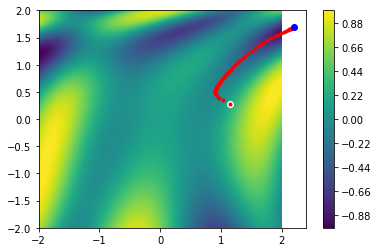

In [42]:
func = lambda th: np.sin(1/2 * th[0] ** 2-1/4 * th[1] **2+3) * np.cos(2*th[0]+1 - np.e ** th[1]) 
#lambda para funcion anonima. th argumento (referencia a theta)
#esta es una funcion aletoria de internet. La representamos en Python asi y sustituimos las x y por theta (th),
#que al ser un vector se va a representar entre corchetes. 0 es X, 1 es Y

res = 100
_X = np.linspace(-2, 2, res) #vector con secuencia de valores de X
_Y = np.linspace(-2, 2, res) #vector con secuencia de valores de Y
#Estas funciones nos van a generar 100 valores para cada eje. Para cada valor de X e Y nos va a generar un nuevo valor

_Z = np.zeros((res, res)) # creamos una matriz de 100x100 llena de elementos 0 para guardar la combinacion de los anteriores.

for ix, x in enumerate(_X): #doble for para almacenar el indice y el valor. ix/iy es el indice, x/y el valor, enumerate recorre todo el vector
    for iy, y in enumerate(_Y):
        _Z[iy, ix] = func([x, y]) #guardamos en forma de vector [x, y] ya que es una función.

plt.contourf(_X, _Y, _Z, 100) #representamos en una grafica el mapa de puntos creados visto desde arriba.
plt.colorbar()

theta = np.random.rand(2)*4-2 #metodo para obtener dos valores aleatorios que se guardan en el vector theta
#con esta theta pondremos un punto aleatorio en el mapa.
_T = np.copy(theta)
learningRate = 0.001 #hay que ajustarlo para que la función sea correcta.Muy grande entra en bucle, muy pequeño es ineficiente.
plt.plot(theta[0], theta[1], "o", c="white") # punto de partida desde el que empezará a bajar.
gradiente = np.zeros(2) #gradiente con dos valores inicializado a 0.
h=0.001 #necesario para crear una diferencia entre un valor y otro.

for _ in range(10000):
    for it, th in enumerate(theta):
        _T = np.copy(theta)
        _T[it] = _T[it]+h
        derivada = (func(_T) - func(theta)) / h
        gradiente[it] = derivada

    theta = theta - learningRate * gradiente
    
    if(_ % 100==0): #cada 100 iteraciones...
        plt.plot(theta[0], theta[1], ".", c="red")

plt.plot(theta[0], theta[1], "o", c="blue") #punto final o mínimo.
plt.show()
